# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

$y=-2+x$

In [2]:
import numpy as np
A=np.array([[3,1],[2,1]])
b=np.array([1,0])
np.linalg.inv(A)@b

array([ 1., -2.])

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

$y=1-2x+x^2$

In [3]:
A=np.array([[1,0,0],[1,1,1],[1,2,4]])
b=np.array([1,0,1])
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [4]:
import matplotlib.pyplot as plt

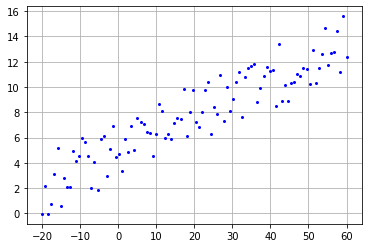

In [8]:
x=np.linspace(-20,60,100)
y=5+1/7*x+(2.5-5*np.random.rand(100))
plt.plot(x,y,'ob',ms=2)
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [2]:
import scipy.optimize as opt

In [3]:
opt.minimize?

In [11]:
#Función objetivo
# beta es la variable que vamos a optimizar (debe ser el primer argumento)
def obj(beta,x,y):
    f=beta[0]+beta[1]*x
    return np.sum((y-f)**2)
beta=[1,-2]
beta[0],beta[1]

(1, -2)

In [12]:
# Condiciones iniciales para el método de minimización
beta0=np.random.rand(2) # np.ones(shape=(2,)) = [1,1]
# beta0=np.array([0,1])
beta0
#0.82+0.88*x
#x=15
#0.82+0.88*100

array([0.81823913, 0.87947675])

In [13]:
# Encontramos el mínimo para beta
sol=opt.minimize(obj,beta0,args=(x,y))
sol

      fun: 198.4011866505522
 hess_inv: array([[ 8.67574168e-03, -1.83787104e-04],
       [-1.83787104e-04,  9.18935581e-06]])
      jac: array([1.90734863e-06, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([5.07117078, 0.13760567])

In [15]:
# beta óptimo
sol.x

array([5.07117078, 0.13760567])

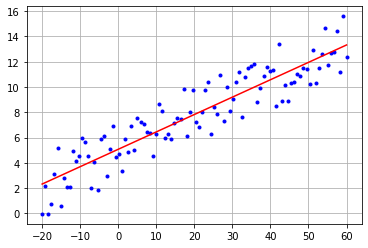

In [16]:
plt.plot(x,y,'ob',ms=3)
plt.plot(x,sol.x[0]+sol.x[1]*x,'r')
plt.grid()

In [4]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Función que queremos encontrar
def f(beta,x):
    return beta[0]+beta[1]*x

def fun(beta,x):
    return beta[0]+beta[1]*x+beta[2]*x**2

# Nueva función objetivo. Depende de la función que queremos encontrar
def obj(beta,x,y,L):
    return np.sum((y-L(beta,x))**2)

In [14]:
# Datos para ser aproximados (Fines didácticos)
x=np.linspace(-20,60,100)
y=5+1/7*x+(2.5-5*np.random.rand(100))

In [15]:
# Condición inicial
beta0=np.random.rand(3)

# Solución
sol=opt.minimize(obj,beta0,args=(x,y,fun))
sol

      fun: 185.08925612671536
 hess_inv: array([[ 9.13296639e-03, -6.20798209e-05, -3.05180445e-06],
       [-6.20798209e-05,  4.29762802e-05, -8.44684299e-07],
       [-3.05180445e-06, -8.44684299e-07,  2.11213226e-08]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 9
     njev: 15
   status: 0
  success: True
        x: array([ 4.77738649e+00,  1.62804882e-01, -2.97179585e-04])

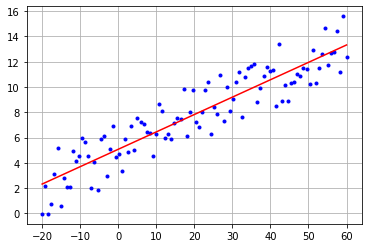

In [20]:
plt.plot(x,y,'ob',ms=3)
plt.plot(x,f(sol.x,x),'r')
plt.grid()

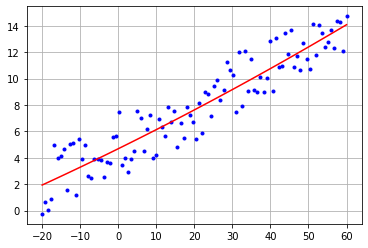

In [12]:
plt.plot(x,y,'ob',ms=3)
plt.plot(x,fun(sol.x,x),'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

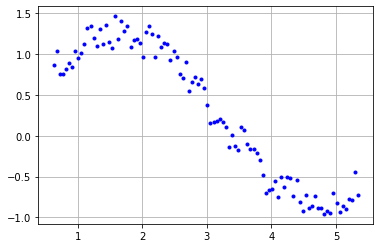

In [16]:
x=np.linspace(np.pi*0.2,np.pi*1.7,100)
y=np.sin(x)+0.5*np.random.rand(100)
plt.plot(x,y,'bo',ms=3)
plt.grid()

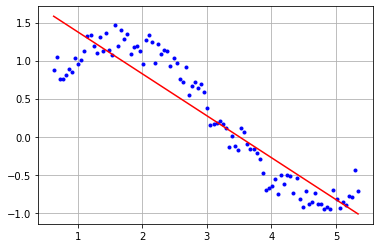

In [17]:
sol=opt.minimize(obj,beta0,args=(x,y,f))
plt.plot(x,y,'ob',ms=3)
plt.plot(x,f(sol.x,x),'r')
plt.grid()

In [18]:
def f2(beta,x):
    return beta[0]+beta[1]*x+beta[2]*x**2
beta0=np.random.rand(3)
beta0

array([0.92598728, 0.49941579, 0.65178898])

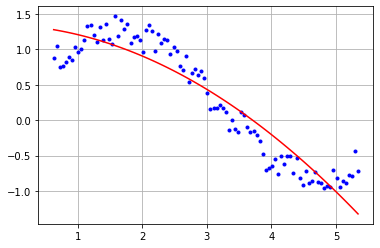

In [19]:
sol=opt.minimize(obj,beta0,args=(x,y,f2))
plt.plot(x,y,'ob',ms=3)
plt.plot(x,f2(sol.x,x),'r')
plt.grid()

In [23]:
def f3(beta,x):
    return beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3
beta0=np.random.rand(4)

In [24]:
def obj(beta,x,y,F):
    return np.sum((y-F(beta,x))**2)

In [25]:
sol=opt.minimize(obj,beta0,args=(x,y,f3))
sol

      fun: 1.6374521102026318
 hess_inv: array([[ 0.44090309, -0.54366038,  0.18976379, -0.01981916],
       [-0.54366038,  0.72085219, -0.26217993,  0.02811292],
       [ 0.18976379, -0.26217993,  0.09837915, -0.01079184],
       [-0.01981916,  0.02811292, -0.01079184,  0.00120532]])
      jac: array([-2.98023224e-08, -1.49011612e-08,  2.98023224e-07, -8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-0.68343633,  2.82013808, -1.18582958,  0.12307207])

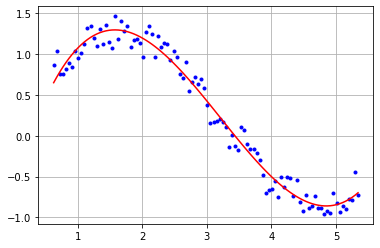

In [26]:
plt.plot(x,y,'bo',ms=3)
plt.plot(x,f3(sol.x,x),'r')
plt.grid()

In [31]:
def P(beta,x,n):
    return np.dot(beta,[x**i for i in range(n+1)])

In [28]:
np.array(range(4+1))

array([0, 1, 2, 3, 4])

In [29]:
def obj(beta,x,y,n):
    return np.sum((y-P(beta,x,n))**2)

In [32]:
n=3 # Grado del polinomio
beta0=np.random.rand(n+1) # Condición inicial para beta
sol=opt.minimize(obj,beta0,args=(x,y,n))
sol

      fun: 1.6374521098899109
 hess_inv: array([[ 0.43907373, -0.5399888 ,  0.18816866, -0.01963091],
       [-0.5399888 ,  0.71344112, -0.25895501,  0.02773207],
       [ 0.18816866, -0.25895501,  0.09697522, -0.01062601],
       [-0.01963091,  0.02773207, -0.01062601,  0.00118573]])
      jac: array([ 2.68667936e-05, -1.23977661e-05, -1.62228942e-04, -6.52611256e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 468
      nit: 9
     njev: 76
   status: 2
  success: False
        x: array([-0.68343564,  2.82013879, -1.18583017,  0.12307216])

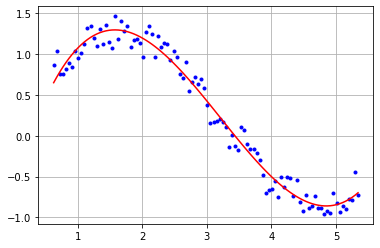

In [33]:
plt.plot(x,y,'bo',ms=3)
plt.plot(x,P(sol.x,x,n),'r')
plt.grid()

In [38]:
n=5 # Grado del polinomio
beta0=np.random.rand(n+1) # Condición inicial para beta
sol=opt.minimize(obj,beta0,args=(x,y,n))
sol

      fun: 1.5403580210305836
 hess_inv: array([[ 6.16801991e+00, -1.49740939e+01,  1.26793649e+01,
        -4.81914646e+00,  8.41244491e-01, -5.48878623e-02],
       [-1.49740939e+01,  3.70328508e+01, -3.17384620e+01,
         1.21615576e+01, -2.13511975e+00,  1.39891001e-01],
       [ 1.26793649e+01, -3.17384620e+01,  2.74907261e+01,
        -1.06239828e+01,  1.87783572e+00, -1.23702868e-01],
       [-4.81914646e+00,  1.21615576e+01, -1.06239828e+01,
         4.13741874e+00, -7.36170054e-01,  4.87695994e-02],
       [ 8.41244491e-01, -2.13511975e+00,  1.87783572e+00,
        -7.36170054e-01,  1.31780315e-01, -8.77703157e-03],
       [-5.48878623e-02,  1.39891001e-01, -1.23702868e-01,
         4.87695994e-02, -8.77703157e-03,  5.87449422e-04]])
      jac: array([ 0.00557584, -0.00953799, -0.04412435, -0.15616009, -0.78845313,
       -3.82190208])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 17
     njev: 53
   status: 2
  success

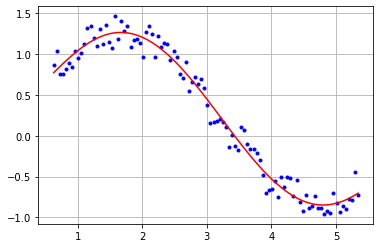

In [39]:
plt.plot(x,y,'bo',ms=3)
plt.plot(x,P(sol.x,x,n),'r')
plt.grid()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
archivo=pd.read_csv('EN_ATM_CO2E_KT_DS2.csv')
archivo

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,1.109267e+04,1.157672e+04,1.271349e+04,1.217811e+04,1.184074e+04,1.062330e+04,9.933903e+03,1.223678e+04,1.137870e+04,...,2.508228e+03,2.500894e+03,1.349456e+03,8.617450e+02,8.727460e+02,8.984150e+02,8.837470e+02,NaN,NaN,NaN
1,AFG,4.143710e+02,4.913780e+02,6.893960e+02,7.077310e+02,8.397430e+02,1.008425e+03,1.092766e+03,1.283450e+03,1.224778e+03,...,8.463436e+03,1.224045e+04,1.075531e+04,9.050156e+03,8.467103e+03,9.035488e+03,8.672455e+03,NaN,NaN,NaN
2,AGO,5.500500e+02,4.547080e+02,1.180774e+03,1.151438e+03,1.224778e+03,1.188108e+03,1.554808e+03,9.937570e+02,1.672152e+03,...,2.905731e+04,3.058645e+04,3.417644e+04,3.369240e+04,4.485108e+04,3.458348e+04,3.469349e+04,NaN,NaN,NaN
3,ALB,2.024184e+03,2.280874e+03,2.464224e+03,2.082856e+03,2.016850e+03,2.174531e+03,2.552232e+03,2.680577e+03,3.072946e+03,...,4.598418e+03,5.240143e+03,4.924781e+03,4.913780e+03,5.489499e+03,4.616753e+03,4.536079e+03,NaN,NaN,NaN
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.170470e+02,4.913780e+02,4.877110e+02,4.767100e+02,4.620420e+02,4.657090e+02,4.693760e+02,NaN,NaN,NaN
5,ARB,5.600530e+04,6.257861e+04,7.056205e+04,8.508575e+04,9.969391e+04,1.200395e+05,1.357586e+05,1.468292e+05,1.673364e+05,...,1.643370e+06,1.660509e+06,1.841219e+06,1.823115e+06,1.932296e+06,1.953774e+06,1.904104e+06,NaN,NaN,NaN
6,ARE,1.100100e+01,1.100100e+01,1.833500e+01,2.200200e+01,1.833500e+01,2.200200e+01,2.566900e+01,9.167500e+02,1.243113e+03,...,1.586234e+05,1.716266e+05,2.197926e+05,2.207131e+05,2.261439e+05,1.947654e+05,2.063238e+05,NaN,NaN,NaN
7,ARG,4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,6.313841e+04,6.554396e+04,6.908261e+04,...,1.879044e+05,1.916228e+05,1.930272e+05,1.937019e+05,1.957775e+05,2.011680e+05,2.013476e+05,NaN,NaN,NaN
8,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.209716e+03,4.917447e+03,5.694851e+03,5.496833e+03,5.529836e+03,4.803770e+03,5.155802e+03,NaN,NaN,NaN
9,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
archivo.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [ ]:
archivo[]

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.